In [1]:
# compare the data/mc veto efficiencies

import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/jschindl/delayed_jet_analyzer_2/delayed_jet_analyzer/lib/')
from histo_utilities_2 import create_TH1D, create_TH2D, std_color_list, make_ratio_plot
import os
import CMS_lumi
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2

# donotdelete = []
print(sys.version)
#tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.22/02
3.6.8 (default, Apr  2 2020, 13:34:55) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
import ROOT as rt

def tdrGrid( gridOn):
  tdrStyle.SetPadGridX(gridOn)
  tdrStyle.SetPadGridY(gridOn)

#fixOverlay: Redraws the axis
def fixOverlay(): gPad.RedrawAxis()

def setTDRStyle():
  tdrStyle =  rt.TStyle("tdrStyle","Style for P-TDR")

   #for the canvas:
  tdrStyle.SetCanvasBorderMode(0)
  tdrStyle.SetCanvasColor(rt.kWhite)
  tdrStyle.SetCanvasDefH(600) #Height of canvas
  tdrStyle.SetCanvasDefW(600) #Width of canvas
  tdrStyle.SetCanvasDefX(0)   #POsition on screen
  tdrStyle.SetCanvasDefY(0)


  tdrStyle.SetPadBorderMode(0)
  #tdrStyle.SetPadBorderSize(Width_t size = 1)
  tdrStyle.SetPadColor(rt.kWhite)
  tdrStyle.SetPadGridX(False)
  tdrStyle.SetPadGridY(False)
  tdrStyle.SetGridColor(0)
  tdrStyle.SetGridStyle(3)
  tdrStyle.SetGridWidth(1)

#For the frame:
  tdrStyle.SetFrameBorderMode(0)
  tdrStyle.SetFrameBorderSize(1)
  tdrStyle.SetFrameFillColor(0)
  tdrStyle.SetFrameFillStyle(0)
  tdrStyle.SetFrameLineColor(1)
  tdrStyle.SetFrameLineStyle(1)
  tdrStyle.SetFrameLineWidth(1)

#For the histo:
  #tdrStyle.SetHistFillColor(1)
  #tdrStyle.SetHistFillStyle(0)
  tdrStyle.SetHistLineColor(1)
  tdrStyle.SetHistLineStyle(0)
  tdrStyle.SetHistLineWidth(2)
  #tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
  #tdrStyle.SetNumberContours(Int_t number = 20)

  tdrStyle.SetEndErrorSize(2)
  #tdrStyle.SetErrorMarker(20)
  #tdrStyle.SetErrorX(0.)

  # tdrStyle.SetMarkerStyle(20)

#For the fit/function:
  tdrStyle.SetOptFit(1)
  tdrStyle.SetFitFormat("5.4g")
  tdrStyle.SetFuncColor(2)
  tdrStyle.SetFuncStyle(1)
  tdrStyle.SetFuncWidth(1)

#For the date:
  tdrStyle.SetOptDate(0)
  # tdrStyle.SetDateX(Float_t x = 0.01)
  # tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
  tdrStyle.SetOptFile(0)
  tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
  tdrStyle.SetStatColor(rt.kWhite)
  tdrStyle.SetStatFont(42)
  tdrStyle.SetStatFontSize(0.025)
  tdrStyle.SetStatTextColor(1)
  tdrStyle.SetStatFormat("6.4g")
  tdrStyle.SetStatBorderSize(1)
  tdrStyle.SetStatH(0.1)
  tdrStyle.SetStatW(0.15)
  # tdrStyle.SetStatStyle(Style_t style = 1001)
  # tdrStyle.SetStatX(Float_t x = 0)
  # tdrStyle.SetStatY(Float_t y = 0)

# Margins:
  tdrStyle.SetPadTopMargin(0.05)
  tdrStyle.SetPadBottomMargin(0.13)
  tdrStyle.SetPadLeftMargin(0.16)
  tdrStyle.SetPadRightMargin(0.02)

# For the Global title:

  tdrStyle.SetOptTitle(0)
  tdrStyle.SetTitleFont(42)
  tdrStyle.SetTitleColor(1)
  tdrStyle.SetTitleTextColor(1)
  tdrStyle.SetTitleFillColor(10)
  tdrStyle.SetTitleFontSize(0.05)
  # tdrStyle.SetTitleH(0) # Set the height of the title box
  # tdrStyle.SetTitleW(0) # Set the width of the title box
  # tdrStyle.SetTitleX(0) # Set the position of the title box
  # tdrStyle.SetTitleY(0.985) # Set the position of the title box
  # tdrStyle.SetTitleStyle(Style_t style = 1001)
  # tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

  tdrStyle.SetTitleColor(5, "XYZ")
  tdrStyle.SetTitleFont(42, "XYZ")
  tdrStyle.SetTitleSize(0.6, "XYZ")
  # tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
  # tdrStyle.SetTitleYSize(Float_t size = 0.02)
  tdrStyle.SetTitleXOffset(0.9)
  tdrStyle.SetTitleYOffset(1.25)
  # tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

  tdrStyle.SetLabelColor(5, "XYZ")
  tdrStyle.SetLabelFont(42, "XYZ")
  tdrStyle.SetLabelOffset(0.007, "XYZ")
  tdrStyle.SetLabelSize(0.5, "XYZ")

# For the axis:

  tdrStyle.SetAxisColor(1, "XYZ")
  tdrStyle.SetStripDecimals(True)
  tdrStyle.SetTickLength(0.03, "XYZ")
  tdrStyle.SetNdivisions(510, "XYZ")
  tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
  tdrStyle.SetPadTickY(1)

# Change for log plots:
  tdrStyle.SetOptLogx(1)
  tdrStyle.SetOptLogy(1)
  tdrStyle.SetOptLogz(1)

# Postscript options:
  tdrStyle.SetPaperSize(20.,20.)
  # tdrStyle.SetLineScalePS(Float_t scale = 3)
  # tdrStyle.SetLineStyleString(Int_t i, const char* text)
  # tdrStyle.SetHeaderPS(const char* header)
  # tdrStyle.SetTitlePS(const char* pstitle)

  # tdrStyle.SetBarOffset(Float_t baroff = 0.5)
  # tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
  # tdrStyle.SetPaintTextFormat(const char* format = "g")
  # tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
  # tdrStyle.SetTimeOffset(Double_t toffset)
  # tdrStyle.SetHistMinimumZero(kTRUE)

  tdrStyle.SetHatchesLineWidth(5)
  tdrStyle.SetHatchesSpacing(0.05)
  rt.gROOT.SetStyle("tdrStyle")
  rt.gROOT.ForceStyle()

  tdrStyle.cd()
  return tdrStyle
tmp = setTDRStyle()


In [3]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
year = '2017'
category = 0
ver = 'V1p17'
sig_ver = 'v52'
singleMuon = True
data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data'+year+'/v5/'+sig_ver+'/normalized/'
bkg_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/v1/'+sig_ver+'/normalized/'

sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_all/v1/v48/normalized/'


data_path_18 = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2018/v5/'+sig_ver+'/normalized/'
data_path_16 = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2016/v5/'+sig_ver+'/normalized/'
lumi = 41.53*1000
print("lumi is "+str(round(lumi/1000,2))+" fb-1")

fpath_bkg['dy_120_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_1pb_weighted.root'
fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root"
fpath_bkg['signal'] = sig_path+"ggH_HToSSTobbbb_MH-125.root"
fpath_bkg['signal_dddd'] = "/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_all/v1/v66/normalized/ggH_HToSSTodddd_merged.root"
fpath_bkg['data16'] = data_path_16+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root"
fpath_bkg['data18'] = data_path_18+"Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018-ZMu-17Sep2018_goodLumi.root"

lumi is 41.53 fb-1


In [4]:
for k,v in fpath_bkg.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['MuonSystem']
    a = tree_bkg[k]["weight"].array()
    print (np.unique(a)*lumi)
    print(a.shape)

dy_120_800 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/v1/v52/normalized/ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_1pb_weighted.root
[-8.627941  -1.2055961 -0.1042499  0.1042499  1.2055961  8.627941 ]
(143195,)
data /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2017/v5/v52/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root
[41530.]
(353864,)
signal /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_all/v1/v48/normalized/ggH_HToSSTobbbb_MH-125.root
[-0.05113493 -0.05097626 -0.05092762 -0.05014454 -0.04998891 -0.04868381
 -0.04850136 -0.04821102 -0.04762714 -0.04512586 -0.03155499 -0.03137229
 -0.03134918 -0.03085022 -0.02978315 -0.02976022 -0.02929758 -0.02871557
  0.0251292   0.02722385  0.02749883  0.02814413  0.02814802  0.02842841
  0.02843235  0.02871455  0.02871557  0.0290046   0.02929758  0.02946261
  0.02948532  0.02

In [5]:
%%time
###########
# 0: jetveto; 1: me11 veto; 2: me12 veto; 3: re12 veto; 4 mb1 segment veto; 5: rb1 veto; 6: mb1 rechit veto; 7: all rechit/segment vetos; 8 loose Muon veto
###########
veto = 8
veto_names = ['jetVeto','me11Veto', 'me12Veto', 're12Veto', 'mb1Veto', 'rb1Veto','mb1RechitVeto','allVeto','muon_veto']
veto_yaxis = ['Jet Veto Efficiency','ME11 Veto Efficiency', 'ME12 Veto Efficiency', 'RE12 Veto Efficiency', 'MB1 Veto Efficiency', 'RB1 Veto Efficiency',\
              'MB1 Rechit Veto Efficiency','Rechit/Segment Veto Efficiency','Muon veto efficiency']


jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
ZPt = {}
ZMass = {}
nJets = {}
sel_lep = {}
sel_ev = {}
mc_corr_weight = {}
lepOverallSF = {}
nJets2 = {}
jetPt = {}
jetPhi = {}
jetEta = {}
npu = {}
npv = {}
cscRechitClusterJetVetoPt = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRchitClusterTimeSpread = {}
cscRechitCluster_match_gLLP_other_decay_r = {}
cscRechitCluster_match_gLLP_other_decay_z = {}
cscRechitClusterRE12 = {}
cscRechitClusterRB1 = {}
cscRechitClusterMB1 = {}
cscRechitClusterME11 = {}
cscRechitClusterMB1Rechit = {}
cscRechitClusterME12 = {}

re12_eta = {}
re12_phi = {}
rb1_eta = {}
rb1_phi = {}
mb1_phi = {}
mb1_eta = {}
mb1_rechit_eta = {}
mb1_rechit_phi = {}
me11_eta = {}
me11_phi = {}
me12_eta = {}
me12_phi = {}
all_eta = {}
all_phi = {}
cscRechitClusterMuonVetoPt = {}
muon_eta = {}
muon_phi = {}




rpcEta = {}
rpcPhi = {}
muonPt = 50
norm = 50
tag_probe = True
masses = [('120','800')]
cluster_index = '3'
for k, T in tree_bkg.items():
########## select cluster ########
    sel_rechitcluster = np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 2.0
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11') <= 0)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12') <= 0)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11') <= 0)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12') <= 0)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4') <= 0)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4') <= 0)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4') <= 0)
#     sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt') < 10)
    #print(len(veto_sel))
    veto_sel = [T.array('cscRechitCluster' + cluster_index + 'JetVetoPt') < 10, 
    np.logical_and(T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11') <= 0, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11') <= 0),\
    np.logical_and(T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12') <= 0, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12') <= 0),\
     T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4') <= 0,\
    T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4') <= 0,\
     T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4') <= 0,    \
     T.array('cscRechitCluster' + cluster_index + '_match_MB1_0p4') <= 0,\
     T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt') < 20,\
         ]
    if veto == 7 :
        veto_sel = [veto_sel[0]]
        
    elif veto == 8:
        veto_sel = [veto_sel[0]]
    elif veto == 4 or veto == 6: 
        veto_sel.pop(6)
        veto_sel.pop(4)
    else:
        print("test")
        veto_sel.pop(6)
        veto_sel.pop(veto-1)
    for v in veto_sel:
        #print(v)
        sel_rechitcluster = np.logical_and(sel_rechitcluster, v)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpread') <= 20)
    #sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt') < 20)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeTotal') < 12.5, T.array('cscRechitCluster' + cluster_index + 'TimeTotal') > -5.0))
    if 'signal' in k:
        sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_gLLP_csc'))
    cond2 = np.logical_and(np.abs(T.array('cscRechitCluster' + cluster_index + 'AvgStation10'))==2, np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 1.6)
    cond3 = np.logical_and(np.abs(T.array('cscRechitCluster' + cluster_index + 'AvgStation10'))==3, np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 1.6)
    cond4 = np.logical_and(np.abs(T.array('cscRechitCluster' + cluster_index + 'AvgStation10'))==4, np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 1.8)
    cond1 = np.logical_and(T.array('cscRechitCluster' + cluster_index + 'NStation10')==1, np.logical_or(np.logical_or(np.abs(T.array('cscRechitCluster' + cluster_index + 'AvgStation10'))==1, cond2), np.logical_or(cond3, cond4)))
    cond2 = np.logical_and(T.array('cscRechitCluster' + cluster_index + 'NStation10') > 1, np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 1.9)
    bdt_sel = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
    sel_rechitcluster = np.logical_and(sel_rechitcluster,bdt_sel)

            
# ########### BRANCHES ############
    if 'signal' in k:
        sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )
        sel_ev[k] = T.array('METTrigger')
        sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('met') > 200)
        sel_ev[k]  = np.logical_and(sel_ev[k], T.array('category') == category)
        sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('nLeptons') == 0)
        sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() == 1)
        sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
        sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
        sel_ev[k] = np.logical_and(sel_ev[k], np.sum(T.array('gLLP_csc'),axis = 1) > 0)
        cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitClusterMuonVetoPt[k] =  T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_rechitcluster][sel_ev[k]][:,0].flatten()       
        cscRechitClusterRE12[k] = T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitClusterRB1[k] = T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitClusterMB1[k] = T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitClusterMB1Rechit[k] = T.array('cscRechitCluster' + cluster_index + '_match_MB1_0p4')[sel_rechitcluster][sel_ev[k]][:,0].flatten()


        cscRechitClusterME11[k] = (T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11')+T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11'))\
        [sel_rechitcluster][sel_ev[k]][:,0].flatten()

        cscRechitClusterME12[k] = (T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12')+T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12'))\
        [sel_rechitcluster][sel_ev[k]][:,0].flatten()






        
        cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitCluster_match_gLLP_other_decay_r[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_other_decay_r')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRechitCluster_match_gLLP_other_decay_z[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_other_decay_z')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        cscRchitClusterTimeSpread[k] = T.array('cscRechitCluster' + cluster_index + 'TimeSpread')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
        weight[k] = (T.array('weight') * T.array('pileupWeight') * T.array('higgsPtWeight'))[sel_ev[k]]

    else:
        
        sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
        sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
        sel_ev[k] = sel_lep[k].sum()>=1
        sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
        if k[:2] == 'dy':sel_ev[k] = np.logical_and(sel_ev[k], T.array('lepFromZ').sum()==2)
        sel_ev[k] = np.logical_and(sel_ev[k], T.array("Flag2_all"))
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
        sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=120)
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<800)

        weight[k] = T.array('weight')[sel_ev[k]]*lumi
        pileupWeight[k] = T.array('pileupWeight')[sel_ev[k]]
        if k[:2] == 'dy': lepOverallSF[k] = T.array('lepOverallSF')[sel_ev[k]]
    #         if k[:2] == 'dy': lepOverallSF[k] = pileupWeight[k]*0.0+1.0

        ZMass[k]= T.array('ZMass')[sel_ev[k]]
        ZMass[k]= T.array('ZMass')[sel_ev[k]]
        ZPt[k] = T.array('ZPt')[sel_ev[k]]
        nJets[k] = T.array('nJets')[sel_ev[k]]

        sel_jet = np.logical_and(np.abs(T.array('jetEta')) <=2.0, np.abs(T.array('jetEta')) >0.8)
        nJets2[k] = (sel_jet.sum())[sel_ev[k]]
        jetPt[k] = T.array('jetPt')[sel_jet][sel_ev[k]]
        jetEta[k] = T.array('jetEta')[sel_jet][sel_ev[k]]
        jetPhi[k] = T.array('jetPhi')[sel_jet][sel_ev[k]]
        
        muon_eta[k] = T.array('lepEta')[sel_lep[k]][sel_ev[k]]
        muon_phi[k] = T.array('lepPhi')[sel_lep[k]][sel_ev[k]]
        
        re12_eta[k] = T.array('rpcEta')[T.array('rpc_RE12')][sel_ev[k]]
        re12_phi[k] = T.array('rpcPhi')[T.array('rpc_RE12')][sel_ev[k]]
        rb1_eta[k] = T.array('rpcEta')[T.array('rpc_RB1')][sel_ev[k]]
        rb1_phi[k] = T.array('rpcPhi')[T.array('rpc_RB1')][sel_ev[k]]
        mb1_phi[k] = T.array('dtSegPhi')[np.abs(T.array('dtSegStation')) == 1][sel_ev[k]]
        mb1_eta[k] = T.array('dtSegEta')[np.abs(T.array('dtSegStation')) == 1][sel_ev[k]]
        mb1_rechit_phi[k] = T.array('dtRechitsPhi')[np.abs(T.array('dtRechitsStation')) == 1][sel_ev[k]]
        mb1_rechit_eta[k] = T.array('dtRechitsEta')[np.abs(T.array('dtRechitsStation')) == 1][sel_ev[k]]
        
        me11_eta[k] = T.array('cscRechitsEta')[np.abs(T.array('cscRechitsChamber')) == 11][sel_ev[k]]
        me11_phi[k] = T.array('cscRechitsPhi')[np.abs(T.array('cscRechitsChamber')) == 11][sel_ev[k]]
        me12_eta[k] = T.array('cscRechitsEta')[np.abs(T.array('cscRechitsChamber')) == 12][sel_ev[k]]
        me12_phi[k] = T.array('cscRechitsPhi')[np.abs(T.array('cscRechitsChamber')) == 12][sel_ev[k]]
        
        all_eta[k] = awkward.JaggedArray.concatenate([me11_eta[k], me12_eta[k], re12_eta[k], mb1_eta[k], rb1_eta[k]], axis=1)
        all_phi[k] = awkward.JaggedArray.concatenate([me11_phi[k], me12_phi[k], re12_phi[k], mb1_phi[k], rb1_phi[k]], axis=1)
        cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev[k]]


        mc_corr_weight[k] =  T.array('ZMass')[sel_ev[k]]
        if norm == 50:
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 1.0734578
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1120967
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.393718
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4190247
    #         cscRechitClusterJetVeto[k] = T.array('cscRechitCluster3JetVetoPt')[sel_cluster]

        if 'dy' in k:  weight[k] = (T.array('weight') * T.array('pileupWeight'))[sel_ev[k]] * mc_corr_weight[k] * lumi


        else: weight[k] = np.ones(ZMass[k].shape)
    npu[k] = T.array('npu')[sel_ev[k]]
    npv[k] = T.array('npv')[sel_ev[k]]
    print(k,np.sum(weight[k]))

dy_120_800 354219.78
data 351814.0
signal 0.18149246
signal_dddd 32422.338
data16 281735.0
data18 497190.0
CPU times: user 2min 4s, sys: 11.7 s, total: 2min 16s
Wall time: 3min 24s


# Jet Cone

In [6]:

import math
def deltaPhi( phi1,  phi2):
    dphi = phi1-phi2
    while np.count_nonzero(dphi.flatten() > math.pi):
        dphi = dphi - (dphi > math.pi)*2*math.pi
    while np.count_nonzero(dphi.flatten() <= -math.pi):
        dphi = dphi + (dphi <= -math.pi)*2*math.pi
    return dphi

In [7]:
#phi is just random number betwen 0 and 359
# eta, took the distribution directly, no weights taken into account
print(veto)
CLUSTER_PER_EVT = 5
var_eta = [jetEta, me11_eta, me12_eta, re12_eta, mb1_eta, rb1_eta, mb1_rechit_eta,all_eta,muon_eta]
var_phi = [jetPhi, me11_phi, me12_phi, re12_phi, mb1_phi, rb1_phi, mb1_rechit_phi,all_phi,muon_phi]


# 0: jetveto; 1: me11 veto; 2: me12 veto; 3: re12 veto; 4 mb1 veto; 5: rb1 veto


matched = {}
for k in ['data', 'dy_120_800','data16','data18']:
#     eta = np.random.randint(0,len(cscRechitClusterEta['signal']),CLUSTER_PER_EVT*len(jetPt[k]))
#     randomly pick the bin, and then randomly choose where in the bin it is
    hist, bins = np.histogram(np.abs(cscRechitClusterEta['signal']),bins = 48,range=[0.8,2.0],weights = weight['signal'])
    bin_width = bins[1]-bins[0]
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(CLUSTER_PER_EVT*len(var_eta[veto][k]))
    pos_in_bin = (np.random.rand(CLUSTER_PER_EVT*len(var_eta[veto][k]))-0.5)*bin_width
    signs = np.random.rand(CLUSTER_PER_EVT*len(var_eta[veto][k]))
    signs[signs < 0.5] = -1
    signs[signs >= 0.5] = 1

    value_bins = np.searchsorted(cdf, values)
    
    eta = bin_midpoints[value_bins]*signs+pos_in_bin
    # for phi, randomly pick a point between 0,360
    phi = np.random.randint(0,360,CLUSTER_PER_EVT*len(var_eta[veto][k]))/180.0*math.pi

    # calculate deltaR between cluster the the jet/hits
    deltaR = ((eta-var_eta[veto][k][np.repeat(np.arange(len(var_eta[veto][k])), CLUSTER_PER_EVT)])**2+ \
              deltaPhi(phi,var_phi[veto][k][np.repeat(np.arange(len(var_eta[veto][k])), CLUSTER_PER_EVT)])**2)**0.5
#               awkward.fromiter(dphi)**2)**0.5
    matched[k] = (deltaR<0.4).any()
    print(k, round((1-np.count_nonzero(matched[k])/ len(deltaR)),4))

8
data 0.969
dy_120_800 0.9682
data16 0.9681
data18 0.9684


In [8]:
(0.9686061384708966-0.9684887005649717)*100/0.9684887005649717

0.012125893245463867

# Jet Veto effieciency

In [9]:
import importlib
importlib.reload(sys.modules['histo_utilities_2'])
import CMS_lumi, tdrstyle
from histo_utilities_2 import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff
import sys
#tdrstyle.setTDRStyle()
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
setTDRStyle()
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
hm = {}
hb = {}
pEff = {}
var = [ZMass, ZPt, nJets, nJets2,npv,cscRechitClusterEta]
title = ['Dimuon mass [GeV]', 'Z p_{T} [GeV]', 'Number of Jets', 'Number of Jets','N_{PV}','Muon /eta']
bins = [ [25,120,800], [0,20,40,60,80,100,200,300,400,500,600,1200], [10,0,20], [15,0,15],  [20,0,160],[20,0,2.4]]
names = ['ZMass','ZPt', 'nJets','nJets_eta2', 'npv','cscRechitClusterEta']
ratio = [[0.5,1.5], [0.5,1.5], [0.5,1.5],[0.5,1.5],[0.5,1.5],[0.5,1.5]]
assert(len(var) == len(title) == len(names) == len(bins)==len(ratio) )

dir_name = '/storage/user/jschindl/delayed_jet_analyzer_2/plots/jet_veto_eff/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)
reweight  =1
reweight_index = 1
for j in range(len(bins)):
    if not j == 4: continue
    for i, k in enumerate(['data','dy_120_800']):
        if 'signal' in k and j != 4:continue
        total_weight = weight[k]
#         if 'dy' in k: total_weight *= lepOverallSF[k]
        if k == 'data': total_weight = total_weight * 0.0 + 1
        ###########
        # reweight
        ##########
        if k == 'dy_120_800' and reweight:
            print(np.sum(weight[k]))
            h_reweight = {}
            print("reweight",names[reweight_index], "plot", names[j])
            h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = total_weight)
            h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index])
            for key, v in h_reweight.items():v.Scale(1./v.Integral())
            h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
            reweight = []
            for m in range(len(var[j][k])):
                reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
            total_weight = total_weight * np.array(reweight)


        if 'signal' in k and j == 4:
            print(veto)
            outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>600)
            nominator = np.logical_and(outside, cscRechitClusterJetVetoPt[k]<10)
            if veto == 0: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>600)
                nominator = np.logical_and(outside, cscRechitClusterJetVetoPt[k]<10)
            elif veto == 1: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>650)
                nominator = np.logical_and(outside, cscRechitClusterME11[k]<=0)
            elif veto == 2: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>800)
                nominator = np.logical_and(outside, cscRechitClusterME12[k]<=0)
            elif veto == 3: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>800)
                nominator = np.logical_and(outside, cscRechitClusterRE12[k]<=0)
            elif veto == 4: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>700)
                nominator = np.logical_and(outside, cscRechitClusterMB1[k]<=0)
            elif veto == 5: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>700)
                nominator = np.logical_and(outside, cscRechitClusterRB1[k]<=0)
            elif veto == 6: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>700)
                nominator = np.logical_and(outside, cscRechitClusterMB1Rechit[k]<=0)
            elif veto == 7:
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>800)
                nominator = np.logical_and(outside, cscRechitClusterRE12[k]<=0)
                nominator = np.logical_and(nominator, cscRechitClusterMB1[k]<=0)
#                 nominator = np.logical_and(nominator, cscRechitClusterME11[k]<=0)
#                 nominator = np.logical_and(nominator, cscRechitClusterME12[k]<=0)
#                 nominator = np.logical_and(nominator, cscRechitClusterRB1[k]<=0)
            elif veto ==8:
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>600)
                nominator = np.logical_and(outside, cscRechitClusterMuonVetoPt[k]<20)
            else: print("ERROR")
        
        


            print(len(nominator), len(var[j][k]))
            hm[k] = create_TH1D(np.abs(var[j][k][nominator]), 'hm1', axis_title = [title[j],veto_yaxis[veto]], binning=bins[j], weights = total_weight[nominator]) 
            hb[k] = create_TH1D(np.abs(var[j][k][outside]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], binning=bins[j], weights = total_weight[outside])
            
            m = create_TH1D(np.abs(var[j][k][nominator]), 'hm1', axis_title = [title[j],veto_yaxis[veto]], binning=[1,0,1000], weights = total_weight[nominator]) 
            b = create_TH1D(np.abs(var[j][k][outside]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], binning=[1,0,1000], weights = total_weight[outside])
            pEff_inclusive = rt.TEfficiency(m,b)
            print(k, pEff_inclusive.GetEfficiency(1), pEff_inclusive.GetEfficiencyErrorUp(1))
            
        else:
            hm[k] = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]), 'hm1',\
                                axis_title = [title[j],veto_yaxis[veto]], binning=bins[j], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]) 
            hb[k] = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], \
                                binning=bins[j], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)])
            m = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]), 'hm1',\
                                axis_title = [title[j],veto_yaxis[veto]], binning=[1,0,1000], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]) 
            b = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], \
                                    binning=[1,0,1000], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)])
            pEff_inclusive = rt.TEfficiency(m,b)
            print(k, b.Integral(), pEff_inclusive.GetEfficiency(1), pEff_inclusive.GetEfficiencyErrorUp(1))

        pEff[k] = rt.TEfficiency(hm[k],hb[k])
        pEff[k].SetLineColor(std_color_list[i])
        pEff[k].SetLineWidth(2)
        #pEff[k].SetMarkerSize(0.02)
        # inclusive efficiency calculation
        
        
        
#     if j == 4: c = make_ratio_pEff([pEff['dy_120_800'],pEff['data'],pEff['signal']], fit = False, logy=False, in_tags = ["MC Control Region","Data Control Region","MC Signal"],\
#                         ratio_bounds = ratio[j], draw_opt = ['E2','E1','E1']) 
#     else: 
    c = make_ratio_pEff([pEff['dy_120_800'],pEff['data']], fit = False, logy=False, in_tags = ["MC Control Region","Data Control Region"], ratio_bounds = ratio[j], draw_opt = ['E2','E1']) 
    #c = make_ratio_pEff([pEff['dy_120_800'],pEff['data'],pEff['signal_dddd']], fit = False, logy=False, in_tags = ["MC Control Region","Data Control Region","MC Signal dddd final state"],\
    #                     ratio_bounds = ratio[j], draw_opt = ['E2','E1','E1']) 
    c.Draw()
    
    if reweight: 
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'_reweight'+names[reweight_index]+'.C')
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'_reweight'+names[reweight_index]+'.png')
    else:
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'.png')
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'.C')


NameError: name 'create_TH1D' is not defined

# Distribution

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h = {}
var = [ZMass, ZPt, nJets, nJets2,npv]
title = ['Dimuon mass [GeV]', 'Z p_{T} [GeV]', 'Number of Jets', 'Number of Jets','npv']
bins = [ [25,120,800], [0,20,40,60,80,100,200,300,400,500,600,1200], [10,0,20], [15,0,15], [20,0,160]]
names = ['ZMass','ZPt', 'nJets','nJets_eta2', 'npv']
ratio = [[0.5,1.5], [0.0,2], [0.5,1.5],[0.5,3],[0.5,5]]

assert(len(var) == len(title) == len(names) == len(bins)==len(ratio) )

dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/jet_veto_eff/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)


reweight  = 0
reweight_index = 1
for j in range(len(bins)):
    if not j == 0: continue
    for i, k in enumerate(['data','dy_120_800']):

        total_weight = weight[k]
        print(weight[k][0])
#         if 'dy' in k: total_weight *= lepOverallSF[k]
        if 'data' in k: total_weight = total_weight * 0.0 + 1
        ###########
        # reweight
        ##########
        if ('dy' in k) and reweight:
            print(np.sum(total_weight))
            h_reweight = {}
            print("reweight",names[reweight_index], "plot", names[j])
            h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = total_weight)
            h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index])
            for key, v in h_reweight.items():v.Scale(1./v.Integral())
            h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
            reweight = []
            for m in range(len(var[j][k])):
                reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
            print(weight[k][0])

            total_weight = total_weight * reweight

            
        
        h[k] = create_TH1D(np.abs(var[j][k]), 'hm1', axis_title = [title[j],'Events'], binning=bins[j], weights = total_weight)
        h[k].SetLineColor(std_color_list[i])
        
        print(k,h[k].Integral(),len(total_weight))
    c = make_ratio_plot([h['dy_120_800'],h['data']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = ratio[j], draw_opt = ['E2','E1']) 
    c.Draw()
      
#     if not reweight:
#         c.SaveAs(dir_name+names[j]+'.png')
#         c.SaveAs(dir_name+names[j]+'.C')
#     else:
#         c.SaveAs(dir_name+names[j]+'_reweight'+names[reweight_index]+'.png')
#         c.SaveAs(dir_name+names[j]+'_reweight'+names[reweight_index]+'.png')

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
#from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h = {}
var = [ZMass, ZPt, nJets, nJets2,npv]
title = ['Dimuon mass [GeV]', 'Z p_{T} [GeV]', 'Number of Jets', 'Number of Jets','npv',"t cluster"]
bins = [ [25,120,800], [0,20,40,60,80,100,200,300,400,500,600,1200], [10,0,20], [15,0,15], [20,0,160]]
names = ['ZMass','ZPt', 'nJets','nJets_eta2', 'npv']
ratio = [[0.5,1.5], [0.0,2], [0.5,1.5],[0.5,3],[0.5,5]]

assert(len(var) == len(title) == len(names) == len(bins)==len(ratio) )

dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/jet_veto_eff/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)


reweight  = 0
reweight_index = 1
for j in range(len(bins)):
    if not j == 0: continue
    for i, k in enumerate(['data','dy_120_800']):

        total_weight = weight[k]
        print(weight[k][0])
#         if 'dy' in k: total_weight *= lepOverallSF[k]
        if 'data' in k: total_weight = total_weight * 0.0 + 1
        ###########
        # reweight
        ##########
        if ('dy' in k) and reweight:
            print(np.sum(total_weight))
            h_reweight = {}
            print("reweight",names[reweight_index], "plot", names[j])
            h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = total_weight)
            h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index])
            for key, v in h_reweight.items():v.Scale(1./v.Integral())
            h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
            reweight = []
            for m in range(len(var[j][k])):
                reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
            print(weight[k][0])

            total_weight = total_weight * reweight

            
        
        h[k] = create_TH1D(np.abs(var[j][k]), 'hm1', axis_title = [title[j],'Events'], binning=bins[j], weights = total_weight)
        h[k].SetLineColor(std_color_list[i])
        
        print(k,h[k].Integral(),len(total_weight))
    c = make_ratio_plot([h['dy_120_800'],h['data']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = ratio[j], draw_opt = ['E2','E1']) 
    c.Draw()
      
#     if not reweight:
#         c.SaveAs(dir_name+names[j]+'.png')
#         c.SaveAs(dir_name+names[j]+'.C')
#     else:
#         c.SaveAs(dir_name+names[j]+'_reweight'+names[reweight_index]+'.png')
#         c.SaveAs(dir_name+names[j]+'_reweight'+names[reweight_index]+'.png')

data 1759070.0 0.9683304245993621 0.00013205326480381085
354219.78
reweight ZPt plot npv
dy_120_800 1771098.6916723119 0.9682923117297867 0.0003912071404419995
8
24563 24563
signal 0.9233248119348534 0.003308614115728251
data16 1408675.0 0.9678719363941293 0.00014859723678051218
data18 2485950.0 0.9684901144431706 0.00011080860440071394


Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: dy_120_800 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: dy_120_800 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorUp>: frequentist confidence intervals

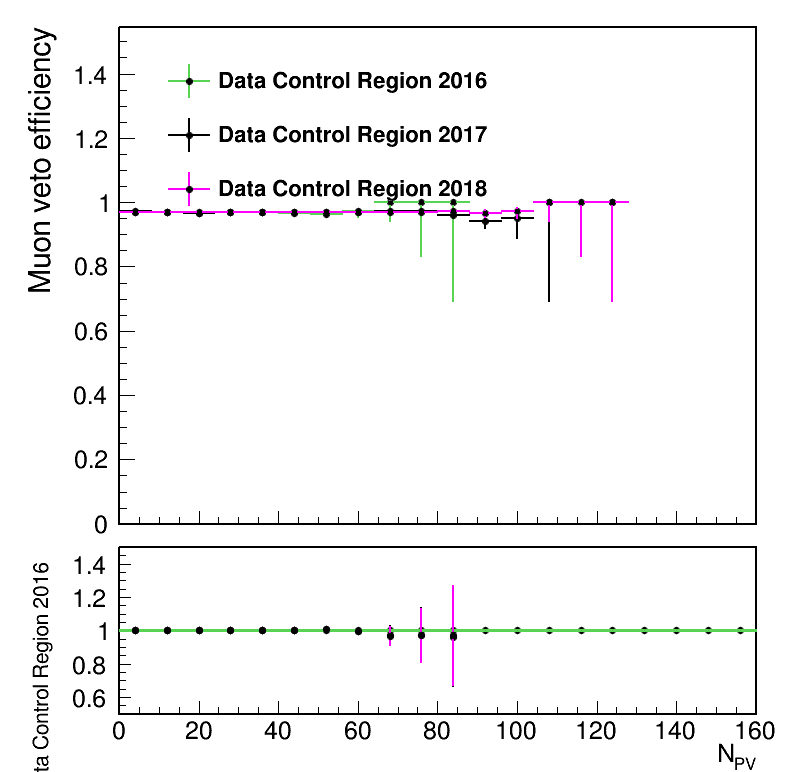

In [16]:
import importlib
#importlib.reload(sys.modules['histo_utilities'])
#from histo_utilities_2 import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
hm = {}
hb = {}
pEff = {}
var = [ZMass, ZPt, nJets, nJets2,npv]
title = ['Dimuon mass [GeV]', 'Z p_{T} [GeV]', 'Number of Jets', 'Number of Jets','N_{PV}']
bins = [ [25,120,800], [0,20,40,60,80,100,200,300,400,500,600,1200], [10,0,20], [15,0,15],  [20,0,160]]
names = ['ZMass','ZPt', 'nJets','nJets_eta2', 'npv']
ratio = [[0.5,1.5], [0.5,1.5], [0.5,1.5],[0.5,1.5],[0.5,1.5]]
assert(len(var) == len(title) == len(names) == len(bins)==len(ratio) )

dir_name = '/storage/user/jschindl/delayed_jet_analyzer_2/plots/jet_veto_eff/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)

reweight  =1
reweight_index = 1
for j in range(len(bins)):
    if not j == 4: continue
    for i, k in enumerate(['data','dy_120_800','signal', 'data16','data18']):
        if k == 'signal' and j != 4:continue
        total_weight = weight[k]
#         if 'dy' in k: total_weight *= lepOverallSF[k]
        if k == 'data': total_weight = total_weight * 0.0 + 1
        ###########
        # reweight
        ##########
        if k == 'dy_120_800' and reweight:
            print(np.sum(weight[k]))
            h_reweight = {}
            print("reweight",names[reweight_index], "plot", names[j])
            h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = total_weight)
            h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index])
            for key, v in h_reweight.items():v.Scale(1./v.Integral())
            h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
            reweight = []
            for m in range(len(var[j][k])):
                reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
            total_weight = total_weight * np.array(reweight)


        if k == 'signal' and j == 4:
            print(veto)
            outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>600)
            nominator = np.logical_and(outside, cscRechitClusterJetVetoPt[k]<10)
            if veto == 0: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>600)
                nominator = np.logical_and(outside, cscRechitClusterJetVetoPt[k]<10)
            elif veto == 1: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>650)
                nominator = np.logical_and(outside, cscRechitClusterME11[k]<=0)
            elif veto == 2: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>800)
                nominator = np.logical_and(outside, cscRechitClusterME12[k]<=0)
            elif veto == 3: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>800)
                nominator = np.logical_and(outside, cscRechitClusterRE12[k]<=0)
            elif veto == 4: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>700)
                nominator = np.logical_and(outside, cscRechitClusterMB1[k]<=0)
            elif veto == 5: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>700)
                nominator = np.logical_and(outside, cscRechitClusterRB1[k]<=0)
            elif veto == 6: 
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>700)
                nominator = np.logical_and(outside, cscRechitClusterMB1Rechit[k]<=0)
            elif veto == 7:
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>500, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>800)
                nominator = np.logical_and(outside, cscRechitClusterRE12[k]<=0)
                nominator = np.logical_and(nominator, cscRechitClusterMB1[k]<=0)
#                 nominator = np.logical_and(nominator, cscRechitClusterME11[k]<=0)
#                 nominator = np.logical_and(nominator, cscRechitClusterME12[k]<=0)
#                 nominator = np.logical_and(nominator, cscRechitClusterRB1[k]<=0)
            elif veto ==8:
                outside = np.logical_or(cscRechitCluster_match_gLLP_other_decay_r[k]>300, np.abs(cscRechitCluster_match_gLLP_other_decay_z[k])>600)
                nominator = np.logical_and(outside, cscRechitClusterMuonVetoPt[k]<20)
            else: print("ERROR")
        
        


            print(len(nominator), len(var[j][k]))
            hm[k] = create_TH1D(np.abs(var[j][k][nominator]), 'hm1', axis_title = [title[j],veto_yaxis[veto]], binning=bins[j], weights = total_weight[nominator]) 
            hb[k] = create_TH1D(np.abs(var[j][k][outside]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], binning=bins[j], weights = total_weight[outside])
            
            m = create_TH1D(np.abs(var[j][k][nominator]), 'hm1', axis_title = [title[j],veto_yaxis[veto]], binning=[1,0,1000], weights = total_weight[nominator]) 
            b = create_TH1D(np.abs(var[j][k][outside]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], binning=[1,0,1000], weights = total_weight[outside])
            pEff_inclusive = rt.TEfficiency(m,b)
            print(k, pEff_inclusive.GetEfficiency(1), pEff_inclusive.GetEfficiencyErrorUp(1))
            
        else:
            hm[k] = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]), 'hm1',\
                                axis_title = [title[j],veto_yaxis[veto]], binning=bins[j], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]) 
            hb[k] = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], \
                                binning=bins[j], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)])
            m = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]), 'hm1',\
                                axis_title = [title[j],veto_yaxis[veto]], binning=[1,0,1000], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)][np.logical_not(matched[k])]) 
            b = create_TH1D(np.abs(var[j][k][np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)]), 'hb1', axis_title = [title[j],veto_yaxis[veto]], \
                                    binning=[1,0,1000], weights = total_weight[np.repeat(np.arange(len(jetPt[k])), CLUSTER_PER_EVT)])
            pEff_inclusive = rt.TEfficiency(m,b)
            print(k, b.Integral(), pEff_inclusive.GetEfficiency(1), pEff_inclusive.GetEfficiencyErrorUp(1))

        pEff[k] = rt.TEfficiency(hm[k],hb[k])
        pEff[k].SetLineColor(std_color_list[i])
        pEff[k].SetLineWidth(2)
        
        # inclusive efficiency calculation
        
        
        
#     if j == 4: c = make_ratio_pEff([pEff['dy_120_800'],pEff['data'],pEff['signal']], fit = False, logy=False, in_tags = ["MC Control Region","Data Control Region","MC Signal"],\
#                         ratio_bounds = ratio[j], draw_opt = ['E2','E1','E1']) 
#     else: 
    #c = make_ratio_pEff([pEff['dy_120_800'],pEff['data']], fit = False, logy=False, in_tags = ["MC Control Region","Data Control Region"], ratio_bounds = ratio[j], draw_opt = ['E2','E1']) 
    c = make_ratio_pEff([pEff['data16'],pEff['data'],pEff['data18']], fit = False, logy=False, in_tags = ["Data Control Region 2016","Data Control Region 2017","Data Control Region 2018"],\
                         ratio_bounds = ratio[j], draw_opt = ['E2','E1','E1']) 
    c.Draw()
    
    if reweight: 
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'_reweight'+names[reweight_index]+'_data_only.C')
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'_reweight'+names[reweight_index]+'_data_only.png')
    else:
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'.png')
        c.SaveAs(dir_name+veto_names[veto]+'_eff'+names[j]+'.C')

In [10]:
import numpy as np
import ROOT as rt
import root_numpy as rtnp
import matplotlib.pyplot as plt
from array import array

std_color_list = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36]

def quantile(a, p, weight=None, f=None):
    if a.shape[0] == 0:
        return None, None
    if weight is None:
        q = np.percentile(a, 100*p).astype(np.float64)
        weight = np.full_like(a, 1.0/a.shape[0], np.float64)
    else:
        i_sort = np.argsort(a)
        a = a[i_sort]
        weight = weight[i_sort]
        cum_sum = np.cumsum(weight, dtype=np.float128)
        idx_q = np.argmax(cum_sum>p*cum_sum[-1])
        q = a[idx_q]

        weight /= np.sum(weight)

    if not f==None:
        f_q = f(q)
    else:
        h = create_TH1D(a, binning=[None, np.percentile(a, 2), np.percentile(a, 98)], weights=weight)
        f_q = h.GetBinContent(h.FindBin(q))/h.GetBinWidth(h.FindBin(q))
    if f_q == 0:
        f_q = 1e-3
        print ('[ERROR]: Failed to estimate pdf')
    sigma_q = np.sqrt(p*(1-p)/(a.shape[0]*f_q**2))
    return q, sigma_q

def EstimateDispersion(aux, w=None):
    q_up, e_up = quantile(aux, 0.15, weight=w)
    q_dwn, e_dwn = quantile(aux, 0.85, weight=w)
    if q_up == None or q_dwn == None:
        print ('[WARNING] Quantile estimation failed')
        print (aux.shape)
        print (q_up, q_dwn)
    disp_est = 0.5*np.abs(q_up - q_dwn)
    disp_unc = 0.5*np.hypot(e_up, e_dwn)
    return disp_est, disp_unc

def create_TH1D(x, name='h', title=None, binning=[None, None, None], weights=None, h2clone=None, axis_title = ['','']):
    if title is None:
        title = name
    if h2clone == None:
        if binning[1] is None:
            binning[1] = min(x)
        if binning[2] is None:
            if ((np.percentile(x, 95)-np.percentile(x, 50))<0.2*(max(x)-np.percentile(x, 95))):
                binning[2] = np.percentile(x, 90)
            else:
                binning[2] = max(x)
        if binning[0] is None:
            bin_w = 4*(np.percentile(x,75) - np.percentile(x,25))/(len(x))**(1./3.)
            if bin_w == 0:
                bin_w = 0.5*np.std(x)
            if bin_w == 0:
                bin_w = 1
            binning[0] = int((binning[2] - binning[1])/bin_w) + 5

        if len(binning) > 3:
            h = rt.TH1D(name, title, len(binning)-1, array('f',binning))
        else:
            h = rt.TH1D(name, title, binning[0], binning[1], binning[2])
    else:
        h = h2clone.Clone(name)
        h.SetTitle(title)
        h.Reset()

    rtnp.fill_hist(h, x, weights=weights)
    h.SetXTitle(axis_title[0])
    h.SetYTitle(axis_title[1])
    h.binning = binning
    return h

def create_prof1D(x, y, name='h', title=None, binning=[None, None, None], h2clone=None, axis_title = ['',''], opt=''):
    if title is None:
        title = name
    if h2clone == None:
        if binning[1] is None:
            binning[1] = min(x)
        if binning[2] is None:
            if ((np.percentile(x, 95)-np.percentile(x, 50))<0.2*(max(x)-np.percentile(x, 95))):
                binning[2] = np.percentile(x, 90)
            else:
                binning[2] = max(x)
        if binning[0] is None:
            bin_w = 4*(np.percentile(x,75) - np.percentile(x,25))/(len(x))**(1./3.)
            if bin_w == 0:
                bin_w = 0.5*np.std(x)
            if bin_w == 0:
                bin_w = 1
            binning[0] = int((binning[2] - binning[1])/bin_w) + 5

        h = rt.TH1D(name, title, binning[0], binning[1], binning[2])
    else:
        h = h2clone.Clone(name)
        h.SetTitle(title)
        h.Reset()

    for i in range(1, binning[0]+1):
        xl = h.GetBinCenter(i) - h.GetBinWidth(i)/2.
        xu = h.GetBinCenter(i) + h.GetBinWidth(i)/2.

        sel = np.logical_and(x<xu, x>xl)
        aux = y[sel]

        if len(aux) > 0:
            if 'Res' in opt:
                q_up, e_up = quantile(aux, 0.15)
                q_dwn, e_dwn = quantile(aux, 0.85)
                if q_up == None or q_dwn == None:
                    print ('[WARNING] Quantile estimation failed')
                    print (aux.shape)
                    print (q_up, q_dwn)
                    return
                disp_est = 0.5*np.abs(q_up - q_dwn)
                h.SetBinContent(i, disp_est)
                disp_unc = 0.5*np.hypot(e_up, e_dwn)
                h.SetBinError(i, disp_unc)
            else:
                h.SetBinContent(i, np.mean(aux))

                if 's' in opt:
                    q_up, e_up = quantile(aux, 0.15)
                    q_dwn, e_dwn = quantile(aux, 0.85)
                    if q_up == None or q_dwn == None:
                        print ('[WARNING] Quantile estimation failed')
                        print (aux.shape)
                        print (q_up, q_dwn)
                        return
                    disp_est = 0.5*np.abs(q_up - q_dwn)
                    h.SetBinError(i, disp_est)
                else:
                    h.SetBinError(i, np.std(aux)/np.sqrt(aux.shape[0]))

    h.SetXTitle(axis_title[0])
    h.SetYTitle(axis_title[1])
    h.binning = binning
    return h

def create_TH2D(sample, name='h', title=None, binning=[None, None, None, None, None, None], weights=None, axis_title = ['','', '']):
    if title is None:
        title = name
    if (sample.shape[0] == 0):
        for i in range(len(binning)):
            if binning[i] == None:
                binning[i] = 1
    else:
        if binning[1] is None:
            binning[1] = min(sample[:,0])
        if binning[2] is None:
            binning[2] = max(sample[:,0])
        if binning[0] is None:
            bin_w = 4*(np.percentile(sample[:,0],75) - np.percentile(sample[:,0],25))/(len(sample[:,0]))**(1./3.)
            if bin_w == 0:
                bin_w = 0.5*np.std(sample[:,0])
            if bin_w == 0:
                bin_w = 1

            binning[0] = int((binning[2] - binning[1])/bin_w)

        if binning[4] is None:
            binning[4] = min(sample[:,1])
        if binning[5] == None:
            binning[5] = max(sample[:,1])
        if binning[3] == None:
            bin_w = 4*(np.percentile(sample[:,1],75) - np.percentile(sample[:,1],25))/(len(sample[:,1]))**(1./3.)
            if bin_w == 0:
                bin_w = 0.5*np.std(sample[:,1])
            if bin_w == 0:
                bin_w = 1
            binning[3] = int((binning[5] - binning[4])/bin_w)
    if len(binning)==6:
        h = rt.TH2D(name, title, binning[0], binning[1], binning[2], binning[3], binning[4], binning[5])
    else:
        h = rt.TH2D(name, title, binning[-2]-1, array('f',binning[:binning[-2]]), binning[-1]-1, array('f', binning[binning[-2]:-2]));



    #for i in range(len(sample)):
#	if weights is None:
#	    h.Fill(sample[i,0],sample[i,1])
#	else:
#	    h.Fill(sample[i,0],sample[i,1],weights[i])
    rtnp.fill_hist(h, sample, weights=weights)
    h.SetXTitle(axis_title[0])
    h.SetYTitle(axis_title[1])
    h.SetZTitle(axis_title[2])
    h.binning = binning
    return h

def rootTH2_to_np(h, cut = None, Norm = False):
    nx = h.GetNbinsX()
    ny = h.GetNbinsY()

    arr = np.zeros((ny, nx))
    pos = np.zeros((ny, nx, 2))

    for ix in range(nx):
        for iy in range(ny):
            x = h.GetXaxis().GetBinCenter( ix+1 );
            y = h.GetYaxis().GetBinCenter( iy+1 );
            z = h.GetBinContent(h.GetBin(ix+1, iy+1))

            if cut == None:
                arr[iy, ix] = z
            else:
                arr[iy, ix] = z if z > cut else 0
            pos[iy, ix] = [x,y]
    return arr, pos

def make_ratio_pEff(h_list_in, title = "", label = "", fit = False, in_tags = None, ratio_bounds = [0.1, 4], ratio_index = 0, logy = False,draw_opt = ['hist','E1'], text = ""):
    h_list = []
    if in_tags == None:
        tag = []
    else:
        tag = in_tags
    for i, h in enumerate(h_list_in):
        h_list.append(h.Clone('h{}aux{}'.format(i, label)))
        if in_tags == None:
            tag.append(h.GetTitle())

    c_out = rt.TCanvas("c_out_ratio"+label, "c_out_ratio"+label, 800, 800)
    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0.03)
    pad1.SetLeftMargin(0.15)
    # pad1.SetGridx()
    if logy:
        pad1.SetLogy()
        
    pad1.Draw()




    pad1.cd()
    
    leg = rt.TLegend(0.68, 0.7, 0.9, 0.9)
    leg = rt.TLegend(0.2, 0.6, 0.5, 0.9)
    #leg = rt.TLegend(0.7, 0.2, 0.9, 0.4)
    leg.SetBorderSize(0)
    leg.SetTextSize(0.045)
    leg.SetFillStyle(0)
    c_out.cd(1)

    for i, h in enumerate(h_list):
        if i == 0:
            h.Draw('AP')
        else:
            h.Draw("Psame")

        leg.AddEntry(h, tag[i], "lep")
    leg.Draw("same")
    c_out.Draw()
    #h_list[0].GetPaintedGraph().GetHistogram().GetXaxis().SetLabelSize(0)
    h_list[0].GetPaintedGraph().GetHistogram().GetXaxis().SetLabelSize(0)
    h_list[0].GetPaintedGraph().GetHistogram().GetXaxis().SetTitle("")
    h_list[0].GetPaintedGraph().GetHistogram().GetXaxis().SetLimits(h_list_in[0].GetCopyTotalHisto().GetXaxis().GetXmin(),h_list_in[0].GetCopyTotalHisto().GetXaxis().GetXmax())
    h_list[0].GetPaintedGraph().GetHistogram().GetYaxis().SetRangeUser(0, 1.5*max(map(lambda x: x.GetPaintedGraph().GetHistogram().GetMaximum(), h_list)))
    if logy:
        h_list[0].GetPaintedGraph().GetHistogram().GetYaxis().SetRangeUser(10e-7, 150*max(map(lambda x: x.GetPaintedGraph().GetHistogram().GetMaximum(), h_list)))
    h_list[0].GetPaintedGraph().GetHistogram().GetYaxis().SetTitleOffset(1.0)
    h_list[0].GetPaintedGraph().GetHistogram().GetYaxis().SetTitleSize(0.06)
    h_list[0].GetPaintedGraph().GetHistogram().GetYaxis().SetLabelSize(0.05)
    h_list[0].GetPaintedGraph().GetHistogram().SetTitle(title)
    #h_list[0].GetPaintedGraph().GetHistogram().DrawCopy('hist')
    h_list[0].GetPaintedGraph().GetHistogram().SetFillColor(h_list_in[0].GetLineColor())
    h_list[0].GetPaintedGraph().GetHistogram().SetFillStyle(3002)
    h_list[0].GetPaintedGraph().GetHistogram().SetLineColor(h_list_in[0].GetLineColor())
    h_list[0].GetPaintedGraph().GetHistogram().SetLineWidth(2)
    h_list[0].GetPaintedGraph().GetHistogram().SetMarkerColor(h_list_in[0].GetLineColor())
    h_list[0].GetPaintedGraph().GetHistogram().SetMarkerSize(2)
    

    c_out.cd()
    pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
    pad2.SetTopMargin(0.03)
    pad2.SetBottomMargin(0.25)
    pad2.SetLeftMargin(0.15)
    # pad2.SetGrid()
    pad2.Draw()
    pad2.cd()
    band = h_list_in[ratio_index].GetCopyTotalHisto()
    for j in range(band.GetXaxis().GetNbins()):
        band.SetBinContent(j+1, 1.0)
        if h_list[0].GetEfficiency(j+1) == 0:
            band.SetBinError(j+1, 0.0)
        else:
            band.SetBinError(j+1, h_list_in[ratio_index].GetEfficiencyErrorUp(j+1)/h_list_in[ratio_index].GetEfficiency(j+1))
            #print(j, h_list_in[0].GetBinError(j+1)/h_list_in[0].GetBinContent(j+1))
    band.SetFillColor(h_list_in[ratio_index].GetLineColor())
    band.SetFillStyle(3002)
    band.SetLineColor(h_list_in[ratio_index].GetLineColor())
    band.GetYaxis().SetTitleOffset(0.6)
    band.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
    band.GetYaxis().SetTitleSize(0.1)
    band.GetYaxis().SetLabelSize(0.12)
    band.GetYaxis().SetNdivisions(506)
    band.GetXaxis().SetTitleOffset(0.95)
    band.GetXaxis().SetTitleSize(0.12)
    band.GetXaxis().SetLabelSize(0.12)
    band.GetXaxis().SetTickSize(0.07)
    band.SetYTitle('Ratio with {}'.format(tag[ratio_index]))
    #band.SetYTitle('Ratio with nominal')
    band.SetTitle("")
    band.DrawCopy('E2')
    ln = rt.TLine(band.GetXaxis().GetXmin(), 1, band.GetXaxis().GetXmax(), 1)
    ln.SetLineWidth(3)
    ln.SetLineColor(h_list_in[ratio_index].GetLineColor())
    ln.DrawLine(band.GetXaxis().GetXmin(), 1, band.GetXaxis().GetXmax(), 1)
    for i, h in enumerate(h_list):
        if i == ratio_index:
            continue
        else: 
            nom = h.GetCopyPassedHisto()
            denom = h_list[ratio_index].GetCopyPassedHisto()
            nom.SetLineColor(h.GetLineColor())
            #set relative error of ratio to be the relative error of data
            for j in range(nom.GetXaxis().GetNbins()+1):
                nom.SetBinContent(j+1,h.GetEfficiency(j+1))
                denom.SetBinContent(j+1,h_list[ratio_index].GetEfficiency(j+1))
                nom.SetBinError(j+1,max(h.GetEfficiencyErrorLow(j+1), h.GetEfficiencyErrorUp(j+1)))
                denom.SetBinError(j+1,max(h_list[ratio_index].GetEfficiencyErrorLow(j+1), h_list[ratio_index].GetEfficiencyErrorUp(j+1)))
            nom.Divide(denom)
            nom.DrawCopy('same'+draw_opt[i])


    pad2.Update()



    c_out.pad1 = pad1
    c_out.pad2 = pad2
    c_out.h_list = h_list
    c_out.leg = leg
    return c_out
def make_ratio_plot(h_list_in, title = "", label = "", fit = False, in_tags = None, ratio_bounds = [0.1, 4], logy = False, ratio_index = 0, draw_opt = ['hist','E1'], text = ""):
    h_list = []
    if in_tags == None:
        tag = []
    else:
        tag = in_tags
    for i, h in enumerate(h_list_in):
        h_list.append(h.Clone('h{}aux{}'.format(i, label)))
        if in_tags == None:
            tag.append(h.GetTitle())

    c_out = rt.TCanvas("c_out_ratio"+label, "c_out_ratio"+label, 800, 800)
    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0.03)
    pad1.SetLeftMargin(0.15)
    pad1.SetRightMargin(0.04)# pad2.SetGrid()
    if logy:
        pad1.SetLogy()
        
    pad1.Draw()
    pad1.cd()
    
    leg = rt.TLegend(0.55, 0.65, 0.9, 0.92)
    #leg = rt.TLegend(0.2, 0.7, 0.5, 0.9)
    #leg = rt.TLegend(0.7, 0.2, 0.9, 0.4)
    leg.SetBorderSize(0)
    leg.SetTextSize(0.045)
    leg.SetFillStyle(0)
    c_out.cd(1)

    for i, h in enumerate(h_list):
        if i == 0:
            h.GetXaxis().SetLabelSize(0)
            h.GetXaxis().SetTitle("")
            h.GetYaxis().SetRangeUser(0, 1.5*max(map(lambda x: x.GetMaximum(), h_list)))
            if logy:
                h.GetYaxis().SetRangeUser(10e-2, 2.5*max(map(lambda x: x.GetMaximum(), h_list)))
            h.GetYaxis().SetTitleOffset(1.0)
            h.GetYaxis().SetTitleSize(0.06)
            h.GetYaxis().SetLabelSize(0.05)
            h.SetTitle(title)
            h.DrawCopy('hist')
            h.SetFillColor(h_list_in[0].GetLineColor())
            h.SetFillStyle(3002)
            #h.SetStats(1)
            h.SetLineColor(h_list_in[0].GetLineColor())
            h.SetLineWidth(2)
            h.SetMarkerColor(h_list_in[0].GetLineColor())
            h.SetMarkerSize(2)
            h.DrawCopy('same'+draw_opt[i])
            if len(text)>0:
                l = rt.TLatex()
                l.SetTextSize(0.045)
                if logy:l.DrawLatex((h.GetXaxis().GetXmax()-h.GetXaxis().GetXmin())*0.1+h.GetXaxis().GetXmin() , h.GetMaximum()/10, text)
                else:l.DrawLatex((h.GetXaxis().GetXmax()-h.GetXaxis().GetXmin())*0.1+h.GetXaxis().GetXmin() , h.GetMaximum()*0.8, text)
        else:
#            h.DrawCopy(draw_opt[i]+"same")
            h.DrawCopy("E1 same")

        leg.AddEntry(h, tag[i], "lep")
    leg.Draw("same")

    c_out.cd()
    pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
    pad2.SetTopMargin(0.03)
    pad2.SetBottomMargin(0.25)
    pad2.SetLeftMargin(0.15)
    pad2.SetRightMargin(0.04)# pad2.SetGrid()
    pad2.Draw()
    pad2.cd()
    band = h_list_in[ratio_index].Clone('h_band')
    for j in range(band.GetXaxis().GetNbins()):
        band.SetBinContent(j+1, 1.0)
        if h_list[ratio_index].GetBinContent(j+1) == 0:
            band.SetBinError(j+1, 0.0)
        else:
            band.SetBinError(j+1, h_list_in[ratio_index].GetBinError(j+1)/h_list_in[ratio_index].GetBinContent(j+1))
            #print(j, h_list_in[0].GetBinError(j+1)/h_list_in[0].GetBinContent(j+1))
    band.SetFillColor(h_list_in[ratio_index].GetLineColor())

    band.SetFillStyle(3002)
    band.SetLineColor(h_list_in[ratio_index].GetLineColor())
    band.SetFillColor(0)
    band.SetLineColor(0)
    band.GetYaxis().SetTitleOffset(0.5)
    band.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
    band.GetYaxis().SetTitleSize(0.11)
    band.GetYaxis().SetLabelSize(0.12)
    band.GetYaxis().SetNdivisions(506)
    band.GetXaxis().SetTitleOffset(0.95)
    band.GetXaxis().SetTitleSize(0.12)
    band.GetXaxis().SetLabelSize(0.12)
    band.GetXaxis().SetTickSize(0.07)
    band.SetYTitle('Ratio with {}'.format(tag[ratio_index]))
    #band.SetYTitle('Ratio with nominal')
    band.SetTitle("")
    band.DrawCopy('E2')
    ln = rt.TLine(h.GetXaxis().GetXmin(), 1, h.GetXaxis().GetXmax(), 1)
    ln.SetLineWidth(3)
    ln.SetLineColor(h_list_in[ratio_index].GetLineColor())
#    ln.DrawLine(h.GetXaxis().GetXmin(), 1, h.GetXaxis().GetXmax(), 1)
    for i, h in enumerate(h_list):
        if i == ratio_index:
            continue
        else: 
            if fit:h.GetFunction("expo").Delete()
            h.Divide(h_list[ratio_index])
            #h.GetYaxis().SetTitleOffset(0.6)
            #h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
            #h.GetYaxis().SetTitleSize(0.12)
            #h.GetYaxis().SetLabelSize(0.12)
            #h.GetYaxis().SetNdivisions(506)
            #h.GetXaxis().SetTitleOffset(0.95)
            #h.GetXaxis().SetTitleSize(0.12)
            #h.GetXaxis().SetLabelSize(0.12)
            #h.GetXaxis().SetTickSize(0.07)
            #h.SetYTitle('Ratio with {}'.format(tag[0]))
            #h.SetTitle("")
            #set relative error of ratio to be the relative error of data
            for j in range(h.GetXaxis().GetNbins()):
                if h_list[i].GetBinContent(j+1) == 0:
                    h.SetBinError(j+1, 0.0)
                else:
                    h.SetBinError(j+1, h_list_in[i].GetBinError(j+1)/h_list_in[i].GetBinContent(j+1)*h.GetBinContent(j+1)) 
            h.DrawCopy('same'+draw_opt[i])

    pad2.Update()

    c_out.pad1 = pad1
    c_out.pad2 = pad2
    c_out.h_list = h_list
    c_out.leg = leg
    return c_out



def binning2d(histo2D,min_event,direc):#returns an appropriate binning in x/y direction with at least min_event points in each binning
    bins = [1]
    i=0
    if direc == 'x':
        nbins = histo2D.GetNbinsX()
    elif direc == 'y':
        nbins =  histo2D.GetNbinsY()
    else:
        return None    
    while i < nbins:
        counter = 0
        while counter < min_event:
            if direc == 'x':
                h1 = histo2D.ProjectionY("h"+str(i),i+1,i+1)
            else:
                h1 = histo2D.ProjectionX("h"+str(i),i+1,i+1)
            counter += h1.Integral()
            i+=1
            if i >nbins:
                break
        bins.append(i)
    bins = bins[:len(bins)-2]+[bins[len(bins)-1]]
    if bins[1] == 1:
        bins.pop(1)
    return bins
def histo2D_projectionFit(histo2D, bins, gaus_thr, rebin, direc): #given the binning, plot the scale and resolution of the projection of 2D map
    proj = []
    if direc == 'x':
        bw = histo2D.GetXaxis().GetBinWidth(1)
        left_edge = histo2D.GetXaxis().GetBinLowEdge(1)
    elif direc == 'y':
        bw = histo2D.GetYaxis().GetBinWidth(1)
        left_edge = histo2D.GetYaxis().GetBinLowEdge(1)
    else:
        return None
    x_bins = [(x-1)*bw+left_edge for x in bins]
    res = rt.TH1F('res','res', len(bins)-1,array( 'f', x_bins))
    res_eff = rt.TH1F('res_eff','res_eff', len(bins)-1,array( 'f', x_bins))
    scale = rt.TH1F('scale','scale',len(bins)-1,array( 'f', x_bins))
    scale_eff = rt.TH1F('scale_eff','scale_eff',len(bins)-1,array( 'f', x_bins))
    for i in range(len(bins)-1):
        key = 'bin'+str(i)
        proj.append(histo2D.ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
        if direc == 'x': 
            y_low = histo2D.GetXaxis().GetBinLowEdge(bins[i])
            y_up = histo2D.GetXaxis().GetBinLowEdge(bins[i+1]-1)+histo2D.GetXaxis().GetBinWidth(1)
        else:
            y_low = histo2D.GetYaxis().GetBinLowEdge(bins[i])
            y_up = histo2D.GetYaxis().GetBinLowEdge(bins[i+1]-1)+histo2D.GetYaxis().GetBinWidth(1)

    for i in range(len(proj)):
        h1 = proj[i]
        hnew = h1.Clone("hnew")
        hnew = hnew.Rebin(rebin)
        SS = rt.TSpectrum()
        n_pks = SS.Search(hnew, 0.1, "", 0.5)
        x_pos = SS.GetPositionX()
        y_pos = SS.GetPositionY()
        pks = []
        if n_pks == 0:
            hnew.SetLineColor(4)
    #         hnew.Rebin(2)
            hnew.GetXaxis().SetRangeUser(-5,5)
            hnew.DrawCopy()
            print("npks == 0",i,hnew.Integral(),n_pks)
            break
        n_pk = hnew.FindBin(x_pos[0])
        thr = gaus_thr* hnew.GetBinContent(n_pk)
        n_low = n_pk
        while hnew.GetBinContent(n_low) > thr:
            n_low -= 1
        x_low = hnew.GetBinCenter(n_low)    
        n_up = n_pk
        while hnew.GetBinContent(n_up) > thr:
            n_up += 1
        x_up = hnew.GetBinCenter(n_up)
        r = hnew.Fit('gaus', 'LRSQ+', '', x_low, x_up)
        r = r.Get()
        scale.SetBinContent(i+1,r.Parameter(1))
        scale.SetBinError(i+1,r.ParError(1))
        if abs(r.Parameter(1)-hnew.GetMean())>1:
            print("scale fit warning", i,r.Parameter(1),hnew.GetMean())
        n_pk = h1.FindBin(r.Parameter(1))
        thr = 0.68 * h1.Integral()
        counter = h1.GetBinContent(n_pk)*1.0
        n_low = n_pk
        n_up = n_pk
        flag = True
        while counter < thr:
            if flag:
                n_low -= 1
                counter += h1.GetBinContent(n_low)
            else:
                n_up += 1
                counter += h1.GetBinContent(n_up)
            flag = not flag
        sigma_eff = (n_up - n_low) *h1.GetBinWidth(1)
        res.SetBinContent(i+1,sigma_eff)
        res.SetBinError(i+1,h1.GetBinWidth(1))
    res_eff.SetBinContent(i+1,r.Parameter(2))
    res_eff.SetBinError(i+1,r.ParError(2))
    return scale, scale_eff, res, res_eff
def create_TGraph(x,y,ex=[],ey=[], axis_title = ['','']):
    x = array("d", x)
    y = array("d", y)
    ex = array("d", ex)
    ey = array("d", ey)
    if not len(x) == len(y):
        print("length of x and y are not equal!")
    if not len(ex)==len(ey):
        print("length of ex and ey are not equal!")
    if len(ex)>0 and not len(x)==len(ex):
        print("leng of ex and x are not equal!")

    if len(ex)==0:gr = rt.TGraph(len(x),x,y)
    else: gr = rt.TGraphErrors(len(x),x,y,ex,ey)
    if len(axis_title) == 2:
        gr.GetXaxis().SetTitle(axis_title[0])
        gr.GetYaxis().SetTitle(axis_title[1])
    return gr